In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanicdata = pd.read_csv('tested.csv')

titanicdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanicdata.size
titanicdata.shape

(418, 12)

In [4]:
titanicdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


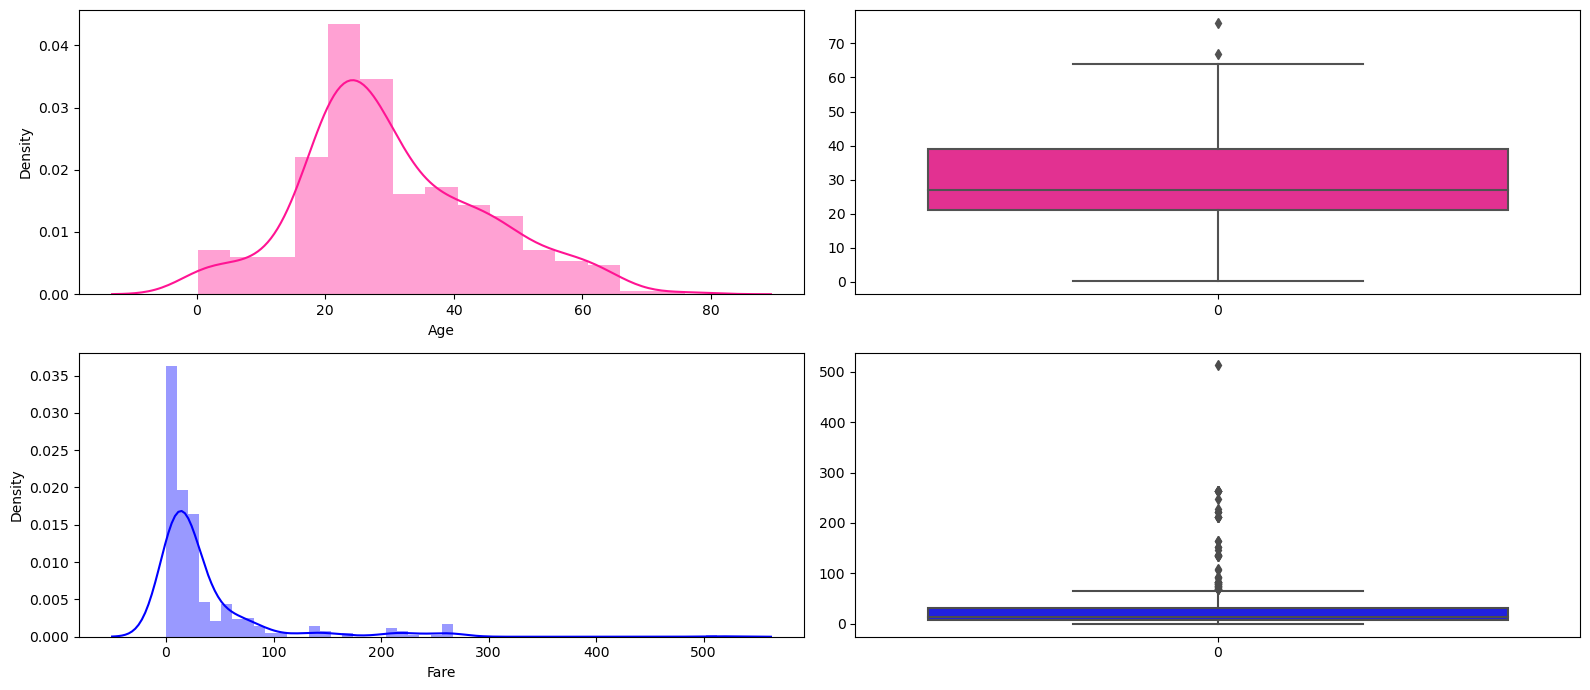

In [5]:
# Data visualization

plt.figure(figsize=(16, 7))

plt.subplot(2, 2, 1)
sns.distplot(titanicdata['Age'], color='DeepPink')
plt.subplot(2, 2, 2)
sns.boxplot(titanicdata['Age'], color='DeepPink')

plt.subplot(2, 2, 3)
sns.distplot(titanicdata['Fare'], color='Blue')
plt.subplot(2, 2, 4)
sns.boxplot(titanicdata["Fare"], color='Blue')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sex')

findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.


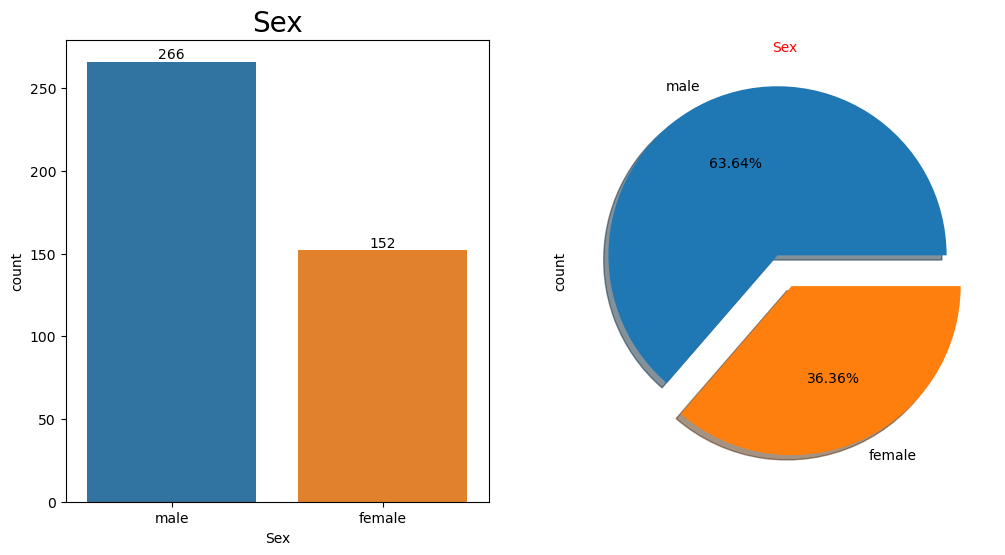

In [6]:
plt.figure(figsize=(12,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=titanicdata)
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)
ax = plt.subplot(1,2,2)
ax = titanicdata['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True)
ax.set_title(label = "Sex", fontsize = 20,color='Red',font='Lucida Calligraphy')

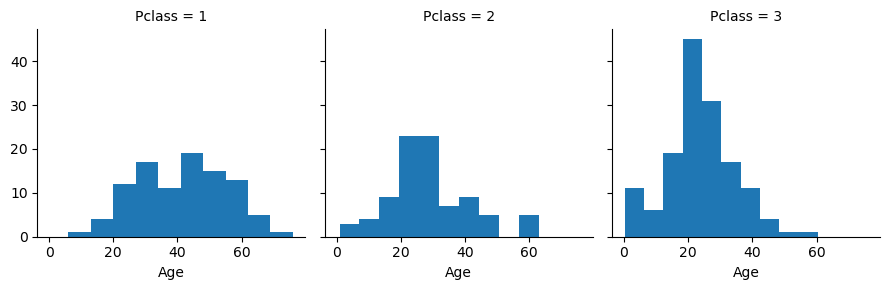

In [7]:
g = sns.FacetGrid(titanicdata, col='Pclass')
g = g.map(plt.hist, "Age")

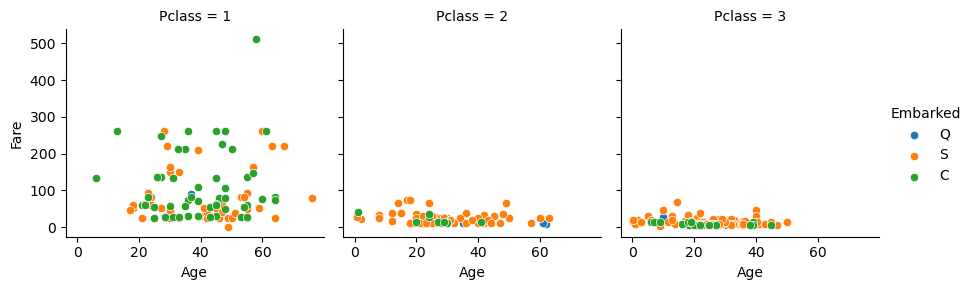

In [8]:
g = sns.FacetGrid(titanicdata, col="Pclass", hue="Embarked")
g.map_dataframe(sns.scatterplot, x="Age", y="Fare")
g.add_legend()
plt.show()

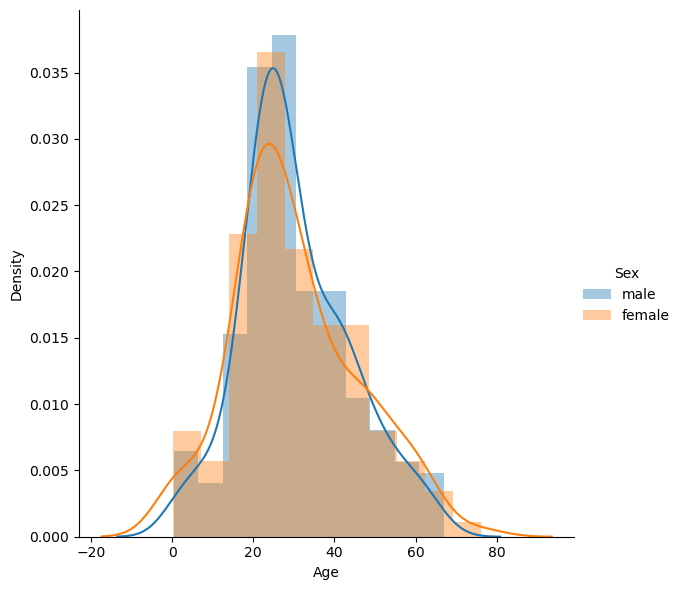

In [9]:
sns.FacetGrid(titanicdata, hue='Sex', height=6).map(sns.distplot, 'Age').add_legend()
plt.show()

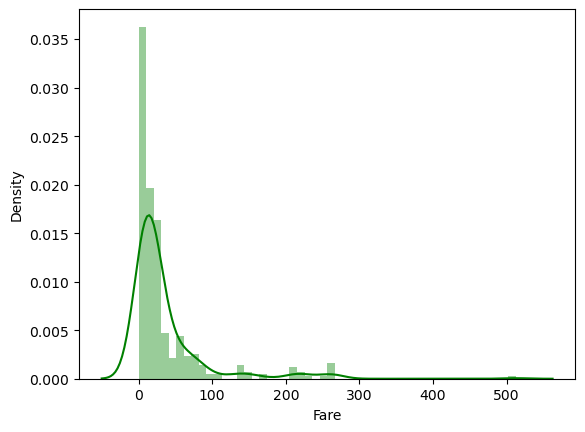

In [10]:
sns.distplot(titanicdata["Fare"], color="g")
plt.show()

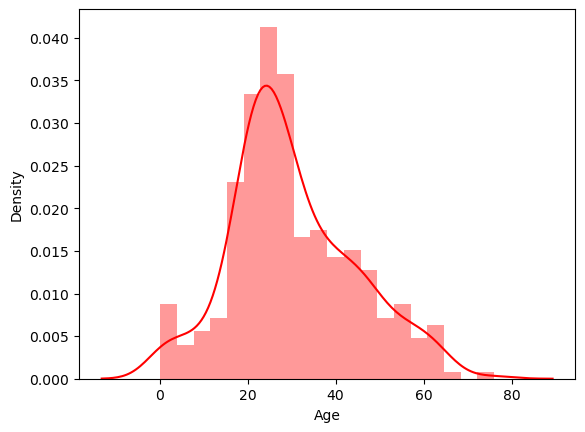

In [11]:
sns.distplot(titanicdata["Age"], color='r', bins=20, kde=True)
plt.show()

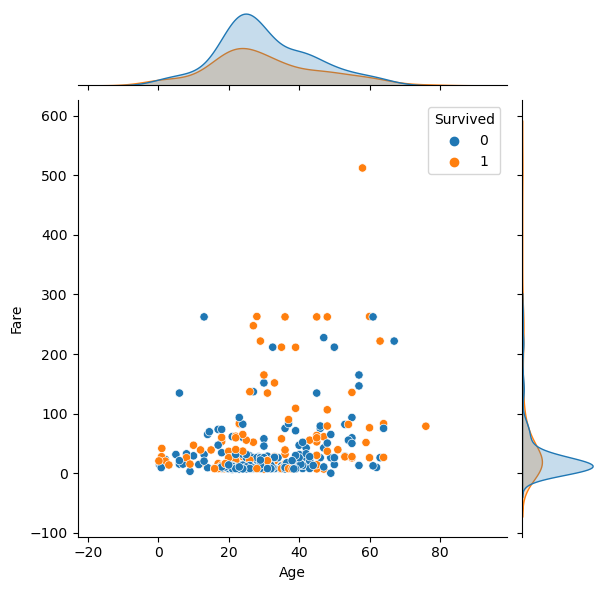

In [12]:
sns.jointplot(x='Age', y='Fare', data=titanicdata, color="olive", hue="Survived")
plt.show()

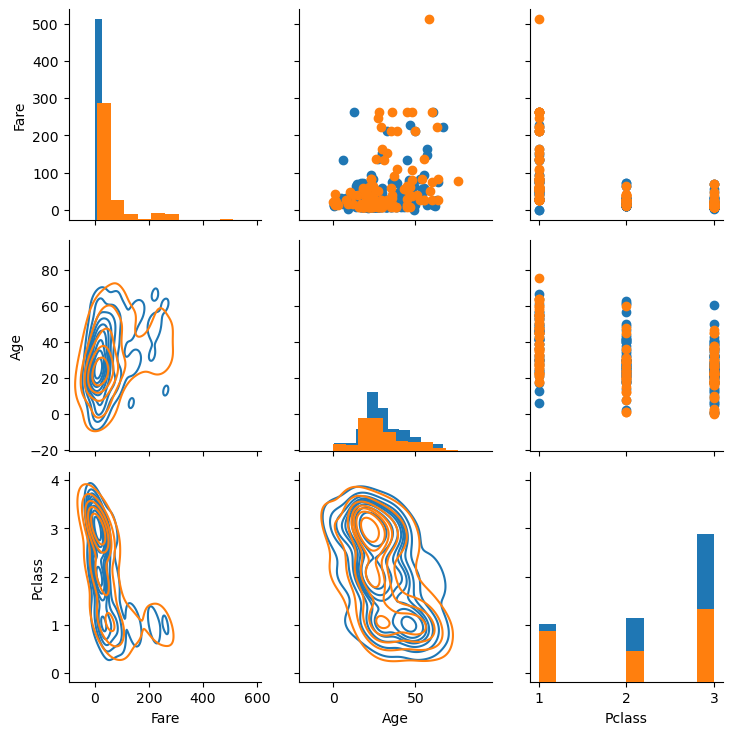

In [13]:
titanic_g = sns.PairGrid(titanicdata, hue="Sex", vars=["Fare", "Age", "Pclass"])
titanic_g.map_diag(plt.hist)
titanic_g.map_upper(plt.scatter)
titanic_g.map_lower(sns.kdeplot)

plt.show()